In [104]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [105]:
print(os.listdir())

['.conda', '.git', '.gitattributes', '.gitignore', '1 LEGO_Datasets.ipynb', 'colors.csv', 'demo.py', 'downloads_schema.png', 'inventories.csv', 'inventory_parts.csv', 'inventory_sets.csv', 'LICENSE.txt', 'markdown-diff', 'morelearning.ipynb', 'parts.csv', 'part_categories.csv', 'README.md', 'sets.csv', 'themes.csv']


## Creating the Panda dataframes

In [106]:
colors = pd.read_csv("colors.csv", dtype={'name': 'str', 'rgb': 'str'})
inventories = pd.read_csv("inventories.csv")
inventory_parts = pd.read_csv("inventory_parts.csv")
inventory_sets = pd.read_csv("inventory_sets.csv")
part_categories = pd.read_csv("part_categories.csv")
parts = pd.read_csv("parts.csv")
sets = pd.read_csv("sets.csv")
themes = pd.read_csv("themes.csv")

## Creating the investigate function

In [107]:
def investigate(db):
    """explores the data"""
    
    print(f"Exploring the data in the dataframe")
    print(db.index)
    print("")
    print("COLUMN NAMES")
    print(db.columns)
    print()
    nRow, nCol = db.shape
    print(f'There are {nRow} rows and {nCol} columns')
    print()
    print("DATA TYPES")
    print(db.dtypes)
    print()
    print("NUMBER OF UNIQUE VALUES IN EACH COLUMN")
    print(db.nunique())
    print()
    print("PREVIEWING THE DATASET")
    print(db.head())
    print()
    print(db.info())
    print()
    print("NUMBER OF NON-NULL VALUES IN EACH COLUMN")
    print(db.count())


In [108]:
# Remove extraneous quotes
# Use the str.replace() method to remove the quotes, brackets, leading dashes from the name column

colors['name'] = colors['name'].str.replace(r'^["\']|["\']$', '', regex=True)
# regex=True: This argument is used to specify that the pattern is a regular expression.
# r'^["\']|["\']$': This is a regular expression pattern used to match specific characters at the beginning or end of the string.
# The ^ symbol matches the start of the string, and the $ symbol matches the end of the string.
# The pattern ["\'] matches either a single or double quote character.
# The | symbol is a logical OR operator that matches either the pattern before or after it.
# The regex pattern ^["\'] matches a single or double quote character at the beginning of the string.
# The regex pattern ["\']$ matches a single or double quote character at the end of the string.

# Remove leading dashes
# r "'-": This regular expression pattern matches a single quote followed by a dash character.
colors['name'] = colors['name'].str.replace(r"'-", '', regex=True)

colors['name'] = colors['name'].str.replace(r'[\[\]]', '', regex=True) #remove brackets
# Strip leading/trailing spaces
colors['name'] = colors['name'].str.strip()
# Replace 'f' with False and 't' with True
colors['is_trans'] = colors['is_trans'].replace({'f': False, 't': True})
# Define the mapping of color names to groups
color_groups = {
    'Red': 'Red',
    'Green': 'Green',
    'Blue': 'Blue',
    'Light Blue': 'Blue',
    'Dark Green': 'Green',
    'Medium Lavender': 'Purple',
    'Yellow': 'Yellow',
    'Orange': 'Orange',
    'Pink': 'Pink',
    'Unknown': 'Unknown\nWild Card',
    'Black': 'Black',
    'Dark Turquoise': 'Blue',
    'Medium Blue': 'Blue',
    'Tan': 'Brown',
    'Light Gray': 'Gray',
    'Dark Gray': 'Gray',
    'Brown': 'Brown',
    'White': 'White',
    'Purple': 'Purple',
    'Lime': 'Green',
    'Magenta': 'Pink',
    'Dark Pink': 'Pink',
    'Light Pink': 'Pink',
    'Bright Pink': 'Pink',
    'Lavender': 'Purple',
    'Sand Blue': 'Blue',
    'Sand Green': 'Green',
    'Sand Purple': 'Purple',
    'Sand Red': 'Red',
    'Sand Yellow': 'Yellow',
    'Dark Red': 'Red',
    'Medium Dark Pink': 'Pink',
    'Dark Brown': 'Brown',
    'Medium Azure': 'Blue',
    'Medium Blue': 'Blue',
    'Medium Green': 'Green',
    'Medium Lime': 'Green',
    'Medium Orange': 'Orange',
    'Medium Red': 'Red',
    'Medium Violet': 'Purple',
    'Medium Yellow': 'Yellow',
    'Bright Light Blue': 'Blue',
    'Bright Light Orange': 'Orange',
    'Bright Light Yellow': 'Yellow',
    'Bright Purple': 'Purple',
    'Bright Red': 'Red',
    'Bright Yellow': 'Yellow',
    'Light Aqua': 'Blue',
    'Light Green': 'Green',
    'Light Lime': 'Green',
    'Light Orange': 'Orange',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Turquoise': 'Blue',
    'Light Yellow': 'Yellow',
    'Olive Green': 'Green',
    'Very Light Bluish Gray': 'Gray',
    'Very Light Gray': 'Gray',
    'Very Light Orange': 'Orange',
    'Very Light Yellow': 'Yellow',
    'Dark Blue-Violet': 'Blue',
    'Dark Blue': 'Blue',
    'Dark Azure': 'Blue',
    'Dark Orange': 'Orange',
    'Dark Tan': 'Brown',
    'Dark Purple': 'Purple',
    'Dark Flesh': 'Brown',
    'Dark Salmon': 'Red',
    'Dark Yellow': 'Yellow',
    'Light Blue-Violet': 'Blue',
    'Light Bluish Gray': 'Gray',
    'Light Grayish Blue': 'Gray',
    'Light Grayish Orange': 'Orange',
    'Light Nougat': 'Brown',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Yellowish Orange': 'Yellow',
    'Medium Blue-Violet': 'Blue',
    'Medium Bluish Gray': 'Gray',
    'Medium Dark Flesh': 'Brown',
    'Medium Dark Pink': 'Pink',
    'Medium Lavender': 'Purple',
    'Medium Nougat': 'Brown',
    'Medium Purple': 'Purple',
    'Medium Reddish Brown': 'Brown',
    'Medium Violet': 'Purple',
    'Medium Yellowish Orange': 'Yellow',
    'Bright Bluish Green': 'Green',
    'Bright Bluish Violet': 'Blue',
    'Bright Green': 'Green',
    'Bright Orange': 'Orange',
    'Bright Purple': 'Purple',
    'Bright Reddish Violet': 'Red',
    'Bright Violet': 'Purple',
    'Bright Yellowish Green': 'Yellow',
    'Light Bluish Green': 'Green',
    'Light Bluish Violet': 'Blue',
    'Light Bright Blue': 'Blue',
    'Light Bright Green': 'Green',
    'Light Brown': 'Brown',
    'Trans-Yellow': 'Yellow',
    'Trans-Black IR Lens': 'Black',
    'Light': 'White',
    'Salmon': 'Red',
    'Light Violet': 'Purple',
    'Glow In Dark Opaque': 'White',
    'Dark Violet' : 'Purple',
    'Trans Flame Yellowish Orange': 'Orange',
    'Trans Fire Yellow': 'Yellow',
    'Trans Light Royal' : 'Blue',
    'Reddish Lilac': 'Purple',
    'No Color' : 'Black',
    'Trans-Dark': 'Black',
    'Trans-Green': 'Green',
    'Trans-Bright Green': 'Green',
    'Trans-Red': 'Red',
    'Trans-Black': 'Black',
    'Chrome Gold': 'Metallic',
    'Chrome Antique Brass': 'Metallic',
    'Chrome Black': 'Metallic',
    'Chrome Blue': 'Metallic',
    'Chrome Green': 'Metallic',
    'Chrome Pink': 'Metallic',
    'Chrome Silver': 'Metallic',
    'Fabuland Brown': 'Brown',
    'Glow in Dark White': 'White',
    'Trans-Light' : 'Clear',
    'Trans-Neon Green': 'Green',
    'Trans-Very Lt': 'Clear',
    'Trans-Dark Pink': 'Pink',
    'Trans-Clear': 'Clear',
    'Trans-Purple': 'Purple',
    'Trans-Neon Orange': 'Orange',
    'Chrome' : 'Metallic',
    'Reddish Brown': 'Brown',
    'Trans-Neon Yellow': 'Yellow',
    'Dark Bluish Gray': 'Gray',
    'Medium': 'Unknown\nWild Card',
    'Speckle Black-Copper': 'Metallic',
    'Speckle DBGray-Silver': 'Metallic',
    'Light Flesh': 'Pink',
    'Milky White': 'White',
    'Metallic Silver': 'Metallic',
    'Metallic Gold': 'Metallic',
    'Metallic Green': 'Metallic',
    'Metallic Gold' : 'Metallic',
    'Royal': 'Blue',
    'Flesh': 'Pink',
    'Violet': 'Purple',
    '-Violet': 'Purple',
    'Glitter Trans-Dark Pink': 'Pink',
    'Glitter Trans-Clear': 'Clear',
    'Aqua': 'Blue',
    'Glitter Trans-Purple': 'Purple',
    'Speckle Black-Silver': 'Metallic',
    'Speckle Black-Gold': 'Metallic',
    'Copper': 'Metallic',
    'Pearl Light Gray': 'Gray',
    'Metal': 'Metallic',
    'Pearl Light Gold': 'Metallic',
    'Trans-Medium': 'Unknown\nWild Card', 
    'Pearl Dark Gray': 'Gray',
    'Pearl Very Light Gray': 'Gray',
    'Flat Silver': 'Metallic',
    'Trans-Orange': 'Orange',
    'Pearl White': 'White',
    'Bright Light': 'White',
    'Rust': 'Brown',
    'Trans-Pink': 'Pink',
    'Sky': 'Blue',
    'Trans-Light Purple': 'Purple',
    'Dark': 'Unknown\nWild Card',
    'Glow In Dark Trans': 'Clear',
    'Pearl Gold': 'Metallic',
    'Maersk': 'Blue',
    'Earth Orange': 'Orange',
    'Sand': 'Yellow',
    'Glitter Trans-Light': 'Clear',
    'Yellowish Green': 'Green',
    'Flat Dark Gold': 'Metallic',
    'Glitter Trans-Neon Green': 'Green',
}

# Apply the mapping to create a new column 'group'
colors['group'] = colors['name'].map(color_groups)

# Count the number of unique names
unique_groups_count = colors['group'].nunique()
# Display the count of unique names
print(f"Number of unique groups: {unique_groups_count}")
print()

# Check for unassigned names
unassigned_names = colors[colors['group'].isna()]

# Count how many have group as NaN
na_count = unassigned_names.shape[0]
print(f"Number of unassigned names : {na_count}")
print()

# Display unassigned names
if not unassigned_names.empty:
    print("Unassigned color names:")
    print(unassigned_names[['id', 'name']])
else:
    print("All color names have been assigned to a group.")

print(colors.head())

Number of unique groups: 14

Number of unassigned names : 0

All color names have been assigned to a group.
   id            name     rgb  is_trans               group
0  -1         Unknown  0033B2     False  Unknown\nWild Card
1   0           Black  05131D     False               Black
2   1            Blue  0055BF     False                Blue
3   2           Green  237841     False               Green
4   3  Dark Turquoise  008F9B     False                Blue


## Color Graph  

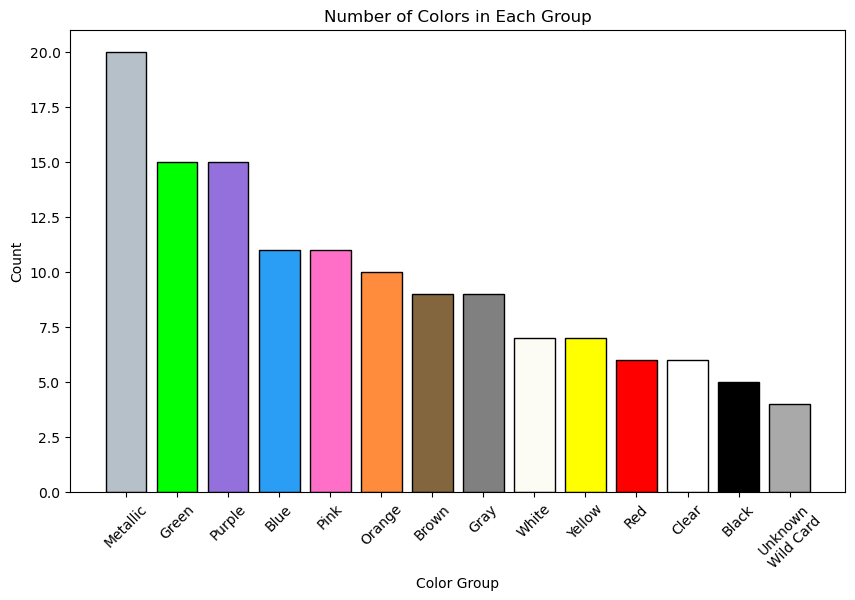

In [109]:
# Define the color mapping for the bar colors
color_mapping = {
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFFF00',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#83653E',
    'Gray': '#808080',
    'White': '#FCFBF4',
    'Clear': '#FFFFFF',
    'Metallic': '#B5C0C9',
    'Unknown\nWild Card': '#A9A9A9'
}

# Count the occurrences of each group
group_counts = colors['group'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(group_counts.index, group_counts.values, color=[color_mapping[group] for group in group_counts.index], edgecolor='black')
plt.title('Number of Colors in Each Group')
plt.xlabel('Color Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Special Color Features-- Glowing and Sparkling

In [110]:
# Count the number of color names containing 'glow'
# Access the name column of the colors dataframe
name_column = colors['name']
# Count the number of color names containing 'glow' using the str.contains() method  
# name_column.str.contains('glow', case=False, na=False) => returns a boolean series (column) where the color names contain 'glow'
#.shape[0] => returns the number of rows in the series that contain 'True'
glow_count = colors[name_column.str.contains('glow', case=False, na=False)].shape[0]
print()

# Display the count of color names containing 'glow'
print(f"Number of pieces that glow in the dark: {glow_count}")
print()

# Count the number of color names containing 'glitter'
glitter_count = colors[colors['name'].str.contains('glitter', case=False, na=False)].shape[0]

# Display the count of color names containing 'glitter'
print(f"Number of pieces with glitter: {glitter_count}")
print()

# Count the number of colors that have is_trans = True
trans_count = colors[colors['is_trans'] == True].shape[0]

# Display the count of colors that have is_trans = True
print(f"Number of pieces that are translucent: {trans_count}")


Number of pieces that glow in the dark: 3

Number of pieces with glitter: 5

Number of pieces that are translucent: 28


## Using RGB hex codes for color names

In [111]:
import webcolors

color_name = webcolors.hex_to_name('#FFA07A')

print(color_name)

lightsalmon


# Ideas for this data set
* Group colors into 10 groups (124 colors out of 135 is too many)
* Track popular themes and colors by year
    ** datasets= colors, sets, themes
* Only 12 pieces had more than version 1 released.  Where those the popular colors and themes?
    ** dataset = inventories
* How has the size of sets changed over time?
* What colors are associated with which themes? 
* Could you predict which theme a set is from just by the bricks it contains?
* What sets have the most-used pieces in them? What sets have the rarest pieces in them?
* Have the colors of LEGOs included in sets changed over time?



# Exploring each dataset

## colors dataset

In [112]:
investigate(colors)

Exploring the data in the dataframe
RangeIndex(start=0, stop=135, step=1)

COLUMN NAMES
Index(['id', 'name', 'rgb', 'is_trans', 'group'], dtype='object')

There are 135 rows and 5 columns

DATA TYPES
id           int64
name        object
rgb         object
is_trans      bool
group       object
dtype: object

NUMBER OF UNIQUE VALUES IN EACH COLUMN
id          135
name        135
rgb         124
is_trans      2
group        14
dtype: int64

PREVIEWING THE DATASET
   id            name     rgb  is_trans               group
0  -1         Unknown  0033B2     False  Unknown\nWild Card
1   0           Black  05131D     False               Black
2   1            Blue  0055BF     False                Blue
3   2           Green  237841     False               Green
4   3  Dark Turquoise  008F9B     False                Blue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  

### rgb values

In [113]:
uniquecolors = colors['rgb'].nunique()
nRow, nCol = colors.shape

# Count the occurrences of each RGB color
rgb_counts = colors['rgb'].value_counts().reset_index()
rgb_counts.columns = ['rgb', 'count']

# Merge the counts with the original DataFrame to get the color names
top_20_rgb_colors = rgb_counts.merge(colors[['rgb', 'name']], on='rgb').drop_duplicates().head(20)

# Display the top 10 most common RGB codes with their color names
print("Top 15 most common RGB codes with their color names:")
print(top_20_rgb_colors)

Top 15 most common RGB codes with their color names:
       rgb  count                     name
0   FFFFFF      3                    White
1   FFFFFF      3              Milky White
2   FFFFFF      3      Glitter Trans-Clear
3   000000      3     Speckle Black-Copper
4   000000      3     Speckle Black-Silver
5   000000      3       Speckle Black-Gold
6   D9E4A7      2       Trans-Bright Green
7   D9E4A7      2               Light Lime
8   635F52      2      Trans-Black IR Lens
9   635F52      2              Trans-Black
10  A5A5CB      2             Trans-Purple
11  A5A5CB      2     Glitter Trans-Purple
12  E4ADC8      2              Bright Pink
13  E4ADC8      2               Trans-Pink
14  C91A09      2                      Red
15  C91A09      2                Trans-Red
16  05131D      2                    Black
17  05131D      2                 No Color
18  DF6695      2          Trans-Dark Pink
19  DF6695      2  Glitter Trans-Dark Pink


## inventory_sets dataset

The dataset inventory_sets has 3 columns: inventory_id, set_num and quauntity.  The inventory_id is the piece/part, the quantity is the number of a specfic piece (inventory_id) included.  A set_num has multiple pieces (inventory_id).  A piece (inventory_id in inventory_sets = id in inventories) in some cases has had different versions (the versions of a piece are in the inventories dataset)

The color is available for each inventory_id, and each inventory_id is categorized (windows, doors, bricks).

In [114]:
investigate(inventory_sets)

Exploring the data in the dataframe
RangeIndex(start=0, stop=2846, step=1)

COLUMN NAMES
Index(['inventory_id', 'set_num', 'quantity'], dtype='object')

There are 2846 rows and 3 columns

DATA TYPES
inventory_id     int64
set_num         object
quantity         int64
dtype: object

NUMBER OF UNIQUE VALUES IN EACH COLUMN
inventory_id     589
set_num         2306
quantity           7
dtype: int64

PREVIEWING THE DATASET
   inventory_id  set_num  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1
3            39  75053-1         1
4            50   4515-1         1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  2846 non-null   int64 
 1   set_num       2846 non-null   object
 2   quantity      2846 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.8+ KB


#### Most sets have only 1 of any kind of piece in the set.  There are 2,846 total peices (count of inventory_id).  2,793 pieces only occur once in a set (see below).

To do: filter using Python to find what iventory_ids have quantities over 1.  What set_nums are they part of, what themes are they part of?

In [115]:
print("COUNT OF quantities...quantity and the number with that quantity")
inventory_sets['quantity'].value_counts()

COUNT OF quantities...quantity and the number with that quantity


quantity
1     2793
2       28
60      17
3        5
7        1
5        1
20       1
Name: count, dtype: int64

quantity= the number of that iventory_id were included.  Each set_num has meany inventory_ids.


What does it mean that quantity was "1" for most sets?  What does it mean if there was more than 1 of a set? the set "Basic Building Set" with set_num = 044-1 had what quantity?  This can't be the number sold, because the highest number is 60.

044-1,Basic Building Set,1968,366,225

set_num 4520-1 had quantity = 2
name = Curved Rails
year = 1991
theme_id =244
num_parts = 8

14 sets had theme 244

set_num = 4520-1, Curved Rails, 1991, theme = 244, 8 parts
set_num = 4531-1, Manual Points, 1991, theme= 244, 6 parts

set num 4530-1 had quantity 2 of iventory_id 50, quantity 5 of inventory_id 309, quantity 1 of inventory 6050, etc.


## inventories dataset

In [116]:
investigate(inventories)

Exploring the data in the dataframe
RangeIndex(start=0, stop=11681, step=1)

COLUMN NAMES
Index(['dirid', 'version', 'set_num'], dtype='object')

There are 11681 rows and 3 columns

DATA TYPES
dirid       int64
version     int64
set_num    object
dtype: object

NUMBER OF UNIQUE VALUES IN EACH COLUMN
dirid      11681
version        5
set_num    11670
dtype: int64

PREVIEWING THE DATASET
   dirid  version set_num
0      1        1  7922-1
1      3        1  3931-1
2      4        1  6942-1
3     15        1  5158-1
4     16        1   903-1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dirid    11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB
None

NUMBER OF NON-NULL VALUES IN EACH COLUMN
dirid      11681
version    11681
set_num    11681
dtype: int6

#### Very few sets had more than one version released

In [117]:
print("COUNT OF DIFFERENT VERSIONS")
inventories['version'].value_counts()

COUNT OF DIFFERENT VERSIONS


version
1    11669
2        9
3        1
4        1
5        1
Name: count, dtype: int64

## themes dataset

In [118]:
investigate(themes)

Exploring the data in the dataframe
RangeIndex(start=0, stop=614, step=1)

COLUMN NAMES
Index(['id', 'name', 'parent_id'], dtype='object')

There are 614 rows and 3 columns

DATA TYPES
id             int64
name          object
parent_id    float64
dtype: object

NUMBER OF UNIQUE VALUES IN EACH COLUMN
id           614
name         402
parent_id     78
dtype: int64

PREVIEWING THE DATASET
   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         614 non-null    int64  
 1   name       614 non-null    object 
 2   parent_id  503 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB
None

NUMBER OF NON-NULL VALUES IN EACH COLU

### 78 total themes

In [119]:
nthemegroups = themes.parent_id.nunique()
print(f"There are {nthemegroups} total themes.")

There are 78 total themes.


## sets dataset

In [120]:
investigate(sets)

Exploring the data in the dataframe
RangeIndex(start=0, stop=11673, step=1)

COLUMN NAMES
Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

There are 11673 rows and 5 columns

DATA TYPES
set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

NUMBER OF UNIQUE VALUES IN EACH COLUMN
set_num      11673
name         10370
year            66
theme_id       575
num_parts     1092
dtype: int64

PREVIEWING THE DATASET
  set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 

In [121]:
inventories.set_num.value_counts

<bound method IndexOpsMixin.value_counts of 0          7922-1
1          3931-1
2          6942-1
3          5158-1
4           903-1
           ...   
11676     31066-1
11677     71018-7
11678    71018-17
11679     60159-1
11680     75090-2
Name: set_num, Length: 11681, dtype: object>

## sets part_categories

In [122]:
investigate(part_categories)

Exploring the data in the dataframe
RangeIndex(start=0, stop=57, step=1)

COLUMN NAMES
Index(['id', 'name'], dtype='object')

There are 57 rows and 2 columns

DATA TYPES
id       int64
name    object
dtype: object

NUMBER OF UNIQUE VALUES IN EACH COLUMN
id      57
name    57
dtype: int64

PREVIEWING THE DATASET
   id                     name
0   1               Baseplates
1   2           Bricks Printed
2   3            Bricks Sloped
3   4  Duplo, Quatro and Primo
4   5           Bricks Special

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      57 non-null     int64 
 1   name    57 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None

NUMBER OF NON-NULL VALUES IN EACH COLUMN
id      57
name    57
dtype: int64
